In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Stock Market dataset

Data from www.statusinvest.com.br

In [225]:
file = 'statusinvest-busca-avancada.csv'

df = pd.read_csv('statusinvest-busca-avancada.csv', sep=';')
pd.set_option("display.max_columns", None)
df.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,"13,98",NaN,"43,08","1,37","0,64","31,40","12,33","3,31","11,58","15,82","4,30","0,51","1,43","-36,80","-0,81","0,93","3,19","1,48","6,14","0,46","0,52","0,45","5,83",NaN,"12.739.093,67","10,19","0,32","-0,31","1.646.635.998,72"
1,ABCB4,"15,37","5,95","6,72","0,76","0,07","45,93","38,82","23,64","4,09","4,09",NaN,NaN,"1,59","0,93","-0,08","2,68","11,37","1,04",NaN,"0,09","0,91","0,04","1,17","5,92","14.384.654,25","20,15","2,29","0,12","3.479.526.916,02"
2,ABEV3,"14,79","4,10","14,63","2,67","1,72","51,93","27,80","22,84","12,02","11,17","-0,88","-0,20","3,34","32,71","-2,39","1,23","18,27","11,73","19,13","0,64","0,35","0,51","4,56","4,99","326.942.954,89","5,51","1,01","0,18","232.545.558.536,13"
3,ADHM3,"1,56",NaN,"-4,09","-1,29","105,12","100,00","-13.548,48","-18.860,61","-5,69","-5,69","0,00",NaN,"770,90","-1,43","-116,16","0,00","-31,47","-2.571,90","22,61","-81,72","82,72","0,14",NaN,NaN,NaN,"-1,21","-0,38","-0,58","25.439.770,20"
4,AERI3,"6,06",NaN,"69,83","4,58","1,57","9,96","7,06","2,52","24,92","27,61","2,86","0,53","1,76","3,41","-4,51","3,40","6,56","2,25","7,41","0,34","0,66","0,89",NaN,NaN,"14.592.805,47","1,33","0,09","-1,35","4.627.929.274,24"


## Variables

Ajustando os tipos das variáveis

#### Quantitativas

P/L   
P/L  
P/L     
P/ATIVOS    
MARGEM BRUTA    
MARG. LIQUID    
P/EBIT      
EV/EBIT 
DIVIDA LIQUIDA / EBIT   
DIV. LIQ. / EBIT    
DIV. LIQ. / PATRI.  
PSR 
P/CAP. GIRO 
P. AT CIR. LIQ.     
LIQ. CORRENTE   
ROE 
ROA     
ROIC    
PASSIVOS / ATIVOS    
GIRO ATIVOS             
CAGR RECEITAS 5 ANOS    
CAGR LUCROS 5 ANOS      
LIQUIDEZ MEDIA DIARIA  
VPA                    
LPA                   
PEG Ratio
VALOR DE MERCADO

In [226]:
# Removing dots
df = df.apply(lambda x: x.str.replace('.',''))

<ipython-input-226-d3c59126889b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df = df.apply(lambda x: x.str.replace('.',''))


In [227]:
# Changing the commas for dots
df = df.apply(lambda x: x.str.replace(',','.'))

In [228]:
# New view
df.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,13.98,NaN,43.08,1.37,0.64,31.40,12.33,3.31,11.58,15.82,4.30,0.51,1.43,-36.80,-0.81,0.93,3.19,1.48,6.14,0.46,0.52,0.45,5.83,NaN,12739093.67,10.19,0.32,-0.31,1646635998.72
1,ABCB4,15.37,5.95,6.72,0.76,0.07,45.93,38.82,23.64,4.09,4.09,NaN,NaN,1.59,0.93,-0.08,2.68,11.37,1.04,NaN,0.09,0.91,0.04,1.17,5.92,14384654.25,20.15,2.29,0.12,3479526916.02
2,ABEV3,14.79,4.10,14.63,2.67,1.72,51.93,27.80,22.84,12.02,11.17,-0.88,-0.20,3.34,32.71,-2.39,1.23,18.27,11.73,19.13,0.64,0.35,0.51,4.56,4.99,326942954.89,5.51,1.01,0.18,232545558536.13
3,ADHM3,1.56,NaN,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,-5.69,0.00,NaN,770.90,-1.43,-116.16,0.00,-31.47,-2571.90,22.61,-81.72,82.72,0.14,NaN,NaN,NaN,-1.21,-0.38,-0.58,25439770.20
4,AERI3,6.06,NaN,69.83,4.58,1.57,9.96,7.06,2.52,24.92,27.61,2.86,0.53,1.76,3.41,-4.51,3.40,6.56,2.25,7.41,0.34,0.66,0.89,NaN,NaN,14592805.47,1.33,0.09,-1.35,4627929274.24


In [229]:
quantitative_data = [i for i in df][1:]

print(f'Quantitative: {quantitative_data}')

for cols in quantitative_data:
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce') # Altering the columns to float
    
df.info()

Quantitative: ['PRECO', 'DY', 'P/L', 'P/VP', 'P/ATIVOS', 'MARGEM BRUTA', 'MARGEM EBIT', 'MARG. LIQUIDA', 'P/EBIT', 'EV/EBIT', 'DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'PSR', 'P/CAP. GIRO', 'P. AT CIR. LIQ.', 'LIQ. CORRENTE', 'ROE', 'ROA', 'ROIC', 'PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS', 'GIRO ATIVOS', 'CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS', ' LIQUIDEZ MEDIA DIARIA', ' VPA', ' LPA', ' PEG Ratio', ' VALOR DE MERCADO']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TICKER                  600 non-null    object 
 1   PRECO                   600 non-null    float64
 2   DY                      347 non-null    float64
 3   P/L                     599 non-null    float64
 4   P/VP                    598 non-null    float64
 5   P/ATIVOS                599 non-null    float64
 6   MARGEM BRUTA            572 non

#### QuaLitativas

TICKER

## Visual and statistical analysis in the introduction of all actions 

### Price

#### Anomalies

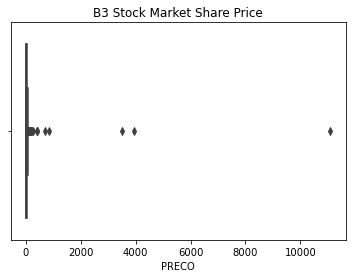

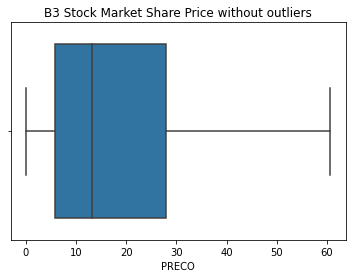

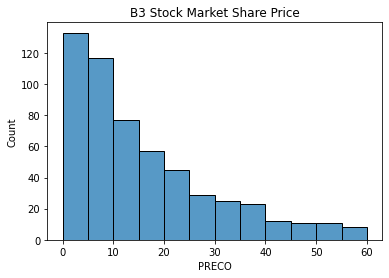

In [240]:
sns.boxplot(data = df['PRECO'], x = df['PRECO']).set(title = 'B3 Stock Market Share Price')
plt.show()

sns.boxplot(data = df['PRECO'], x = df['PRECO'], showfliers = False).set(title = 'B3 Stock Market Share Price without outliers')
plt.show()

q1 = df['PRECO'].quantile(q = 0.25)
q2 = df['PRECO'].quantile(q = 0.5)
q3 = df['PRECO'].quantile(q = 0.75)

# Quartis de preço
q1, q2, q3
iqr = q3 - q1

max_limit = q3 + iqr * 1.5

q1, q2, q3, iqr, max_limit

mean_price = df['PRECO'].mean()
median_price = df['PRECO'].median()

# B3 Stock Market Stocks Price without outliers
sns.histplot(df['PRECO'], bins = [0,5,10,15,20,25,30,35,40,45,50,55,60]).set(title = 'B3 Stock Market Share Price')
plt.show()

In [231]:
print(mean_price, median_price)

df[df.PRECO >= 60]

56.59826666666658 13.149999999999999


,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
25,APTI3,197.64,239.54,-0.36,0.01,0.01,89.80,-18.93,-40.70,-0.78,-8.28,1.18,-0.02,0.15,0.04,-0.01,2.85,-3.99,-2.22,-3.90,0.56,0.44,0.05,-22.74,NaN,NaN,13589.62,-542.83,0.00,4.444275e+07
26,APTI4,3500.00,14.88,-6.45,0.26,0.14,89.80,-18.93,-40.70,-13.86,-8.28,1.18,-0.02,2.62,0.71,-0.21,2.85,-3.99,-2.22,-3.90,0.56,0.44,0.05,-22.74,NaN,NaN,13589.62,-542.83,0.05,4.444275e+07
28,ARZZ3,74.16,1.25,25.70,4.77,2.36,51.34,19.09,14.53,19.56,20.35,0.72,0.18,3.73,17.38,-4.53,1.40,18.56,9.19,16.04,0.49,0.50,0.63,7.26,19.13,6.592500e+07,15.52,2.88,0.03,7.406568e+09
41,BAUH4,82.00,NaN,21.90,4.34,2.83,19.25,9.20,10.78,25.67,24.99,-0.68,-0.11,2.36,-90.08,-4.02,0.90,19.84,12.93,12.36,0.65,0.35,1.20,10.90,28.77,6.845826e+04,18.87,3.74,0.55,4.282222e+08
46,BBML3,3936.42,0.01,5752.19,1032.22,163.50,11.18,2.21,2.16,5625.34,5636.69,11.34,2.08,124.20,-2168266.21,-281.39,1.00,17.94,2.84,-1.23,0.16,0.84,1.32,45.38,57.80,NaN,3.81,0.68,75.25,1.604517e+11
71,BMKS3,236.38,3.35,26.12,0.56,0.50,35.17,4.64,21.10,118.78,-31.83,-150.61,-0.72,5.51,0.67,-2.23,37.44,2.16,1.93,-0.03,0.89,0.11,0.09,1.12,-17.39,1.482113e+04,418.61,9.05,56.31,1.074938e+08
73,BNBR3,71.00,6.71,4.78,0.86,0.10,73.15,54.42,29.97,2.63,2.63,NaN,NaN,1.43,1.07,-0.11,NaN,18.00,2.12,NaN,0.12,0.88,0.07,-9.48,33.23,1.988682e+04,82.52,14.86,22.77,6.132374e+09
81,BPAR3,182.07,5.69,9.08,1.06,0.13,76.88,26.74,14.45,4.90,4.90,NaN,NaN,1.31,0.68,-0.16,NaN,11.70,1.44,NaN,0.12,0.88,0.10,3.12,-1.31,NaN,171.42,20.06,-0.30,1.733607e+09
112,BTTL4,11091.73,NaN,3119.58,2291.17,745.29,15.66,8.30,6.03,2266.19,2.77,0.11,0.12,188.20,2696.55,-2315.35,1.69,73.44,23.89,52.61,0.33,0.67,3.96,5.92,-3.83,NaN,4.84,3.56,7.79,1.930388e+08
113,CALI3,98.18,NaN,5.72,5.09,0.25,32.91,20.55,9.53,2.65,4.91,3.12,6.00,0.55,0.90,-0.49,2.25,89.07,4.35,20.21,0.05,0.95,0.46,-7.97,-15.22,NaN,19.28,17.17,-0.03,2.458220e+07


Some conclusions: As the mean > median we have a skewed distribution to the right.

And for further analysis, trying to establish what are some good shares in Brazil

### DY

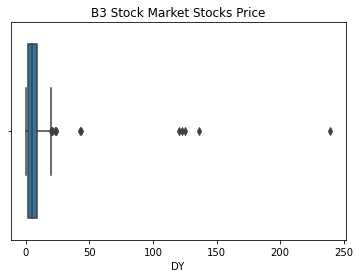

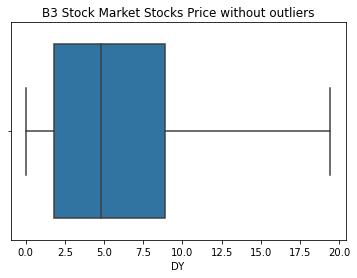

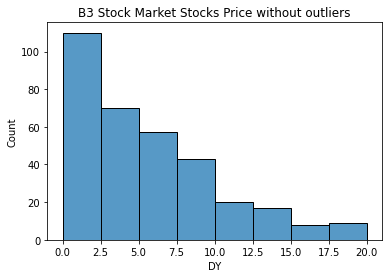

In [232]:
sns.boxplot(data = df['DY'], x = df['DY']).set(title = 'B3 Stock Market Share DY')
plt.show()

sns.boxplot(data = df['DY'], x = df['DY'], showfliers = False).set(title = 'B3 Stock Market Share DY without outliers')
plt.show()

q1 = df['DY'].quantile(q = 0.25)
q2 = df['DY'].quantile(q = 0.5)
q3 = df['DY'].quantile(q = 0.75)

# Quartis de preço
q1, q2, q3
iqr = q3 - q1

max_limit = q3 + iqr * 1.5

q1, q2, q3, iqr, max_limit

mean_price = df['DY'].mean()
median_price = df['DY'].median()

# B3 Stock Market Stocks Price without outliers
sns.histplot(df['DY'], bins = [0,2.5,5,7.5,10,12.5,15,17.5,20]).set(title = 'B3 Stock Market Share DY without outliers')
plt.show()

This is a good indicator, so let's see who are these outliers.

In [233]:
df[df.DY >= 20]

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
25,APTI3,197.64,239.54,-0.36,0.01,0.01,89.80,-18.93,-40.70,-0.78,-8.28,1.18,-0.02,0.15,0.04,-0.01,2.85,-3.99,-2.22,-3.90,0.56,0.44,0.05,-22.74,NaN,NaN,13589.62,-542.83,0.00,4.444275e+07
84,BRAP3,23.89,43.09,1.72,0.64,0.64,NaN,NaN,NaN,1.74,1.40,-0.48,-0.18,NaN,3.66,-0.78,65.33,37.43,37.32,36.46,1.00,0.00,0.00,NaN,NaN,9.439916e+06,37.01,13.85,0.00,1.005482e+10
85,BRAP4,26.60,42.47,1.92,0.72,0.71,NaN,NaN,NaN,1.94,1.40,-0.48,-0.18,NaN,4.09,-0.87,65.33,37.43,37.32,36.46,1.00,0.00,0.00,NaN,NaN,2.384189e+08,37.01,13.85,0.00,1.005482e+10
129,CEBR3,15.11,125.50,0.69,0.57,0.49,-8.37,-222.59,-185.32,0.57,-0.21,-0.78,-0.79,NaN,0.68,-2.01,22.04,83.39,71.51,60.69,0.86,0.04,-0.39,-36.10,128.57,4.047631e+04,26.41,22.03,0.00,1.096026e+09
130,CEBR5,15.40,123.14,0.70,0.58,0.50,-8.37,-222.59,-185.32,0.58,-0.21,-0.78,-0.79,NaN,0.69,-2.05,22.04,83.39,71.51,60.69,0.86,0.04,-0.39,-36.10,128.57,2.208273e+04,26.41,22.03,0.00,1.096026e+09
131,CEBR6,15.29,136.43,0.69,0.58,0.50,-8.37,-222.59,-185.32,0.58,-0.21,-0.78,-0.79,NaN,0.69,-2.03,22.04,83.39,71.51,60.69,0.86,0.04,-0.39,-36.10,128.57,7.642797e+04,26.41,22.03,0.00,1.096026e+09
168,CPLE3,5.87,20.32,2.83,0.74,0.32,21.58,25.34,24.76,2.77,4.05,0.97,0.26,0.70,7.32,-0.42,1.22,26.26,11.36,14.31,0.43,0.56,0.46,4.51,36.55,5.944494e+06,7.88,2.07,0.06,1.788064e+10
215,EALT4,6.65,20.47,5.05,0.77,0.31,24.45,11.27,8.72,3.91,7.26,2.41,0.47,0.44,4.12,-0.57,1.20,15.17,6.14,10.74,0.40,0.60,0.70,11.42,199.72,2.898604e+05,8.64,1.31,0.12,1.846650e+08
287,GOAU3,10.09,23.27,2.65,0.72,0.14,25.98,27.04,5.81,0.57,1.00,0.37,0.47,0.15,0.45,-0.27,2.80,27.27,5.32,23.28,0.19,0.44,0.91,0.11,NaN,8.602371e+05,13.81,3.76,0.00,1.190873e+10
288,GOAU4,11.46,20.28,3.04,0.83,0.16,25.98,27.04,5.81,0.65,1.00,0.37,0.47,0.18,0.52,-0.31,2.80,27.27,5.32,23.28,0.19,0.44,0.91,0.11,NaN,8.590427e+07,13.81,3.76,0.00,1.190873e+10


In [234]:
df[df.DY >= 15]

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
25,APTI3,197.64,239.54,-0.36,0.01,0.01,89.80,-18.93,-40.70,-0.78,-8.28,1.18,-0.02,0.15,0.04,-0.01,2.85,-3.99,-2.22,-3.90,0.56,0.44,0.05,-22.74,NaN,NaN,13589.62,-542.83,0.00,4.444275e+07
84,BRAP3,23.89,43.09,1.72,0.64,0.64,NaN,NaN,NaN,1.74,1.40,-0.48,-0.18,NaN,3.66,-0.78,65.33,37.43,37.32,36.46,1.00,0.00,0.00,NaN,NaN,9.439916e+06,37.01,13.85,0.00,1.005482e+10
85,BRAP4,26.60,42.47,1.92,0.72,0.71,NaN,NaN,NaN,1.94,1.40,-0.48,-0.18,NaN,4.09,-0.87,65.33,37.43,37.32,36.46,1.00,0.00,0.00,NaN,NaN,2.384189e+08,37.01,13.85,0.00,1.005482e+10
100,BRKM3,47.20,16.04,2.62,2.94,0.40,31.51,24.39,14.87,1.60,2.43,0.81,1.49,0.39,3.48,-0.73,1.33,112.04,15.14,42.34,0.14,0.88,1.02,4.54,36.65,3.685679e+06,16.01,17.94,-0.01,3.805325e+10
101,BRKM5,49.11,15.49,2.71,3.04,0.41,31.51,24.39,14.87,1.65,2.43,0.81,1.49,0.40,3.61,-0.76,1.33,112.04,15.14,42.34,0.14,0.88,1.02,4.54,36.65,2.060558e+08,16.01,17.94,-0.01,3.805325e+10
122,CATA3,103.61,15.54,3.39,0.11,0.06,24.41,4.14,2.18,1.78,7.13,5.36,0.34,0.07,0.18,-0.12,2.35,3.36,1.63,3.19,0.48,0.52,0.75,-4.76,NaN,NaN,909.58,30.60,-0.05,1.494035e+07
129,CEBR3,15.11,125.50,0.69,0.57,0.49,-8.37,-222.59,-185.32,0.57,-0.21,-0.78,-0.79,NaN,0.68,-2.01,22.04,83.39,71.51,60.69,0.86,0.04,-0.39,-36.10,128.57,4.047631e+04,26.41,22.03,0.00,1.096026e+09
130,CEBR5,15.40,123.14,0.70,0.58,0.50,-8.37,-222.59,-185.32,0.58,-0.21,-0.78,-0.79,NaN,0.69,-2.05,22.04,83.39,71.51,60.69,0.86,0.04,-0.39,-36.10,128.57,2.208273e+04,26.41,22.03,0.00,1.096026e+09
131,CEBR6,15.29,136.43,0.69,0.58,0.50,-8.37,-222.59,-185.32,0.58,-0.21,-0.78,-0.79,NaN,0.69,-2.03,22.04,83.39,71.51,60.69,0.86,0.04,-0.39,-36.10,128.57,7.642797e+04,26.41,22.03,0.00,1.096026e+09
134,CEEB3,34.00,17.93,5.22,1.40,0.38,24.02,18.76,12.09,3.36,8.04,3.57,1.49,0.63,-14.30,-0.48,0.89,26.85,7.29,14.02,0.27,0.73,0.60,10.93,38.42,1.316929e+05,24.27,6.52,0.08,1.184869e+10


### P/L

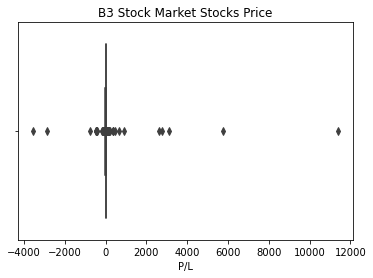

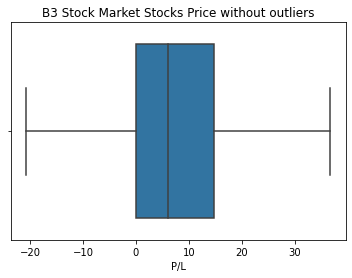

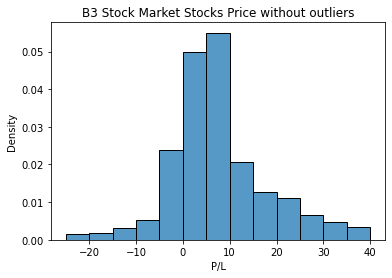

In [235]:
sns.boxplot(data = df['P/L'], x = df['P/L']).set(title = 'B3 Stock Market Share P/L')
plt.show()

sns.boxplot(data = df['P/L'], x = df['P/L'], showfliers = False).set(title = 'B3 Stock Market Share P/L without outliers')
plt.show()

q1 = df['P/L'].quantile(q = 0.25)
q2 = df['P/L'].quantile(q = 0.5)
q3 = df['P/L'].quantile(q = 0.75)

# Quartis de preço
q1, q2, q3
iqr = q3 - q1

max_limit = q3 + iqr * 1.5

q1, q2, q3, iqr, max_limit

mean_price = df['P/L'].mean()
median_price = df['P/L'].median()

# B3 Stock Market Stocks Price without outliers
sns.histplot(df['P/L'], bins = [-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40], stat = 'density').set(title = 'B3 Stock Market Share P/L without outliers')
plt.show()

In [236]:
df.rename({'P/L':'PL'}, axis = 'columns', inplace = True)
df.query('PL > 0 and PL < 5')

,TICKER,PRECO,DY,PL,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
12,ALLD3,15.00,5.07,4.11,0.92,0.34,15.43,8.39,5.93,2.91,2.75,-0.12,-0.04,0.24,1.46,-1.23,1.47,22.32,8.19,21.00,0.37,0.63,1.38,NaN,NaN,2.740885e+06,16.34,3.65,0.02,1.382461e+09
20,AMAR3,3.11,NaN,2.89,0.87,0.24,45.25,-0.62,11.55,-53.38,-133.37,-80.16,1.31,0.33,3.28,-0.49,1.17,30.18,8.34,-3.69,0.28,0.72,0.72,-7.53,NaN,2.684870e+07,3.56,1.07,-0.02,8.085502e+08
34,AZEV3,3.97,NaN,2.00,4.84,1.27,12.35,360.13,334.31,1.86,1.16,-0.51,-1.32,6.69,3.08,-2.63,4.84,241.84,63.35,259.62,0.26,0.74,0.19,-38.42,144.07,2.878462e+05,0.82,1.98,0.00,1.934790e+08
35,AZEV4,3.28,NaN,1.65,3.99,1.05,12.35,360.13,334.31,1.53,1.16,-0.51,-1.32,5.52,2.54,-2.17,4.84,241.84,63.35,259.62,0.26,0.74,0.19,-38.42,144.07,1.878123e+06,0.82,1.98,0.00,1.934790e+08
42,BAZA3,39.50,6.58,2.07,0.41,0.05,42.47,90.94,50.17,1.14,1.14,NaN,NaN,1.04,1.66,-0.05,NaN,19.80,2.34,NaN,0.12,0.88,0.05,-8.12,17.84,4.967844e+04,96.39,19.09,0.03,1.171016e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,TRPL4,24.14,14.86,4.24,1.09,0.56,69.83,117.80,85.32,3.07,4.41,1.00,0.36,3.62,7.34,-0.65,2.38,25.80,13.31,19.95,0.52,0.47,0.16,23.49,49.38,2.387634e+07,22.07,5.69,0.07,1.764361e+10
575,USIM3,14.24,9.15,2.16,0.88,0.46,34.70,36.48,26.38,1.56,1.54,-0.11,-0.06,0.57,1.26,-0.99,3.08,40.77,21.12,30.05,0.52,0.41,0.80,9.57,NaN,9.603353e+06,16.09,6.56,0.00,1.877117e+10
576,USIM5,16.01,8.95,2.43,0.99,0.51,34.70,36.48,26.38,1.76,1.54,-0.11,-0.06,0.64,1.41,-1.11,3.08,40.77,21.12,30.05,0.52,0.41,0.80,9.57,NaN,2.834459e+08,16.09,6.56,0.00,1.877117e+10
577,USIM6,17.93,7.95,2.73,1.11,0.58,34.70,36.48,26.38,1.98,1.54,-0.11,-0.06,0.72,1.59,-1.25,3.08,40.77,21.12,30.05,0.52,0.41,0.80,9.57,NaN,2.319000e+03,16.09,6.56,0.00,1.877117e+10


In [237]:
media_PL = df['PL'].mean()
mediana_PL = df['PL'].median()

print(media_PL, mediana_PL)

41.0924707846411 6.09


Like "DY", in "P/L" the mean > median we have a skewed distribution to the right.

### P/VP

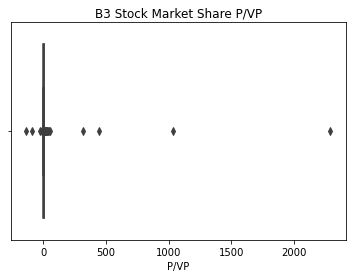

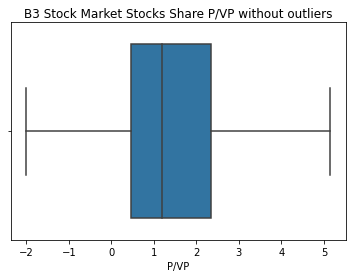

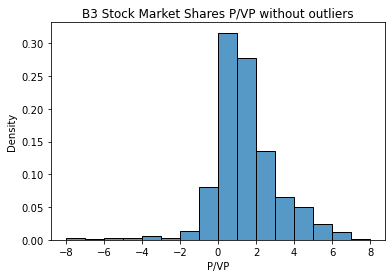

In [242]:
sns.boxplot(data = df['P/VP'], x = df['P/VP']).set(title = 'B3 Stock Market Share P/VP')
plt.show()

sns.boxplot(data = df['P/VP'], x = df['P/VP'], showfliers = False).set(title = 'B3 Stock Market Stocks Share P/VP without outliers')
plt.show()

q1 = df['P/VP'].quantile(q = 0.25)
q2 = df['P/VP'].quantile(q = 0.5)
q3 = df['P/VP'].quantile(q = 0.75)

# Quartis de preço
q1, q2, q3
iqr = q3 - q1

max_limit = q3 + iqr * 1.5

q1, q2, q3, iqr, max_limit

mean_price = df['P/VP'].mean()
median_price = df['P/VP'].median()

# B3 Stock Market Stocks Price without outliers
sns.histplot(df['P/VP'], bins = [-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8], stat = 'density').set(title = 'B3 Stock Market Shares P/VP without outliers')
plt.show()

In [241]:
media_PVP = df['P/VP'].mean()
mediana_PVP = df['P/VP'].median()

print(media_PVP, mediana_PVP)

8.30454849498329 1.2
